In [3028]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from fontTools.ttLib import TTFont

from dataclasses import dataclass
from typing import Callable

from IPython.display import Math, Latex, display

import sympy

import scipy as sp
import numpy as np

import itertools

font_path = '../../extra/Cinzel-VariableFont_wght.ttf'
# font_path = '../../extra/Triodion-Regular.ttf'

cinzel_font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)

In [3029]:
SAVE_PLOTS = False
RED = '#6F1D1B'
RICH_BLACK = '#011627'

In [3030]:
x_values_ = [3, 5, 7, 9, 11, 13]
y_values_ = [3.5, 4.4, 5.7, 6.1, 6.5, 7.3]
n_ = len(x_values_)

<h2> <center> Задача 1. Пункт 2 </center> </h2>

### - Проанализировать исходные данные. 
### - Изобразить исходные данные графически при помощи библиотеки matplotlib, привести код для построения значений. 
### - Подобрать вид функции, наилучшим образом описывающие исходные данные, обосновать выбор именно этого вида функции.

In [3031]:
def decorate_plot(ax, x_ticks, xname, yname, loc):
    SIZE_TICKS = 12

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # x axis name
    ax.set_xlabel(xname, fontsize=15)
    ax.xaxis.set_label_coords(0.98, 0.05)

    # y axis name
    ax.set_ylabel(yname, rotation=0, fontsize=15)
    ax.yaxis.set_label_coords(0.025, 0.95)

    ax.set_xticks(x_ticks)

    # Adjust the font size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

    if loc:
        plt.legend(fontsize=10, loc=loc)

    # Update font settings
    plt.rcParams.update({
        "font.family": cinzel_font.get_name(), 
        "font.size": 16
    })

    # Adjust layout
    plt.tight_layout()

In [3032]:
def buildClassicBar(filename, plotname, x_values, y_values, type):
    _, ax = plt.subplots(figsize=(10, 6))

    match type:
        case 'scatter':
            # colors = [sp.stats.uniform.rvs(0, 100) for _ in range(n_)]

            ax.scatter(x_values, 
                       y_values, 
                       # c=colors,
                       # cmap='Reds',
                       # cmap='hot',
                       color=RED,
                       s=50)
        case 'plot':
            ax.plot(x_values, 
                    y_values, 
                    color=RED)
        case 'stem':
            ax.stem(x_values, 
                    y_values, 
                    color=RED)
        case 'stackplot':
            ax.stackplot(x_values, 
                         y_values, 
                         color=RED)

    plt.grid(linestyle='-', linewidth=0.25)

    ax.set_title(plotname)
    decorate_plot(ax, np.arange(x_values[0], x_values[-1]+1, 1), 'x', 'y', '')
    
    if SAVE_PLOTS:
        plt.savefig(f'images/{filename}.png', dpi=300, transparent=True)

    plt.show()

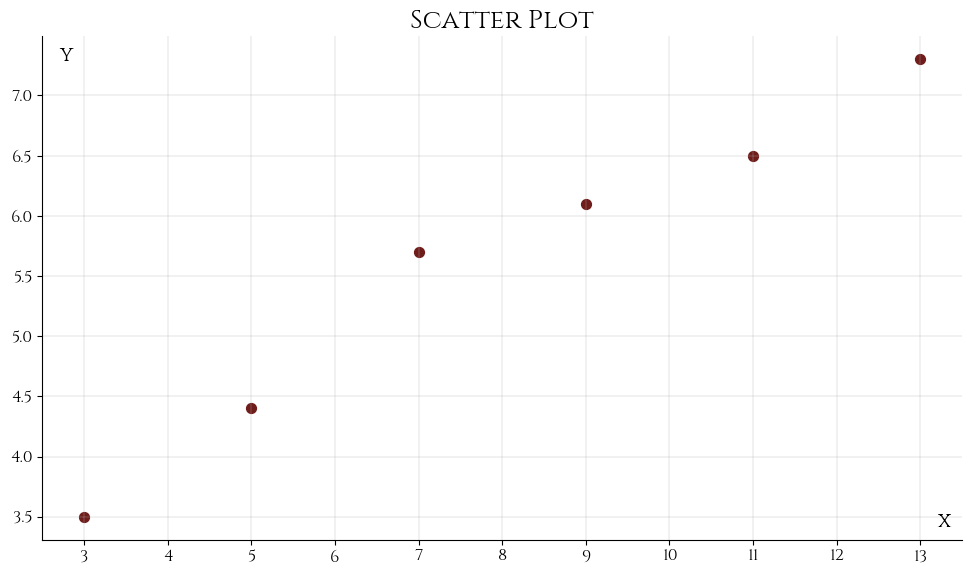

In [3033]:
buildClassicBar('initial_scatter_plot', 'Scatter Plot', x_values_, y_values_, 'scatter')

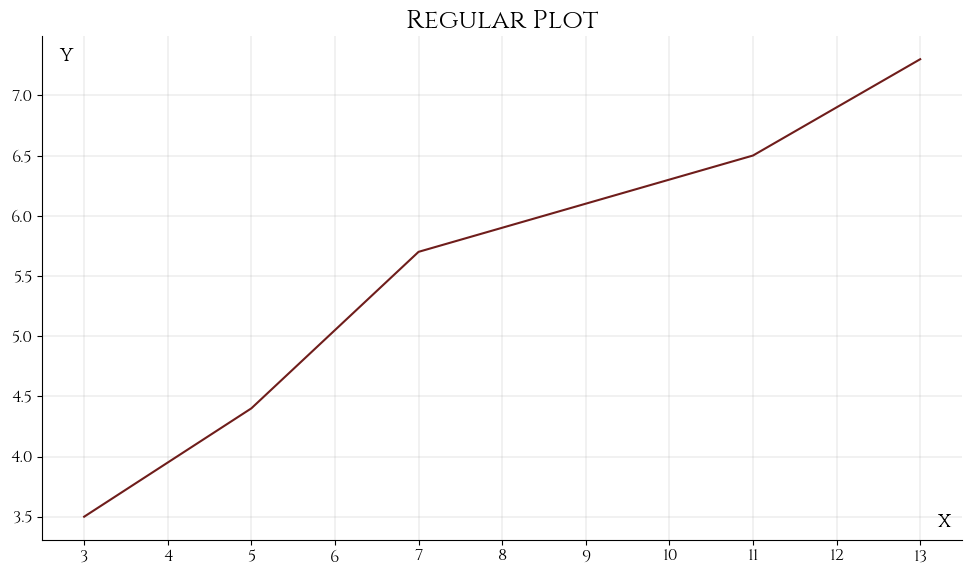

In [3034]:
buildClassicBar('initial_regular_plot', 'Regular Plot', x_values_, y_values_, 'plot')

In [3035]:
def buildBar(filename, plotName, plotTitle, x_values, y_values, new_x_values, new_y_values):
    _, ax = plt.subplots(figsize=(10, 6))

    # initial scatter data
    ax.scatter(x_values, 
               y_values, 
               color=RED,
               label='Initial data',
               s=50)

    # approximation
    ax.plot(new_x_values, new_y_values, color=RICH_BLACK, label=plotName)

    plt.grid(linestyle='-', linewidth=0.25)

    ax.set_title(plotTitle)
    decorate_plot(ax, np.arange(new_x_values[0], new_x_values[-1]+1, 1), 'x', 'y', loc=(0.005, 0.825))
    
    if SAVE_PLOTS:
        plt.savefig(f'images/{filename}.png', dpi=300, transparent=True)

    plt.show()

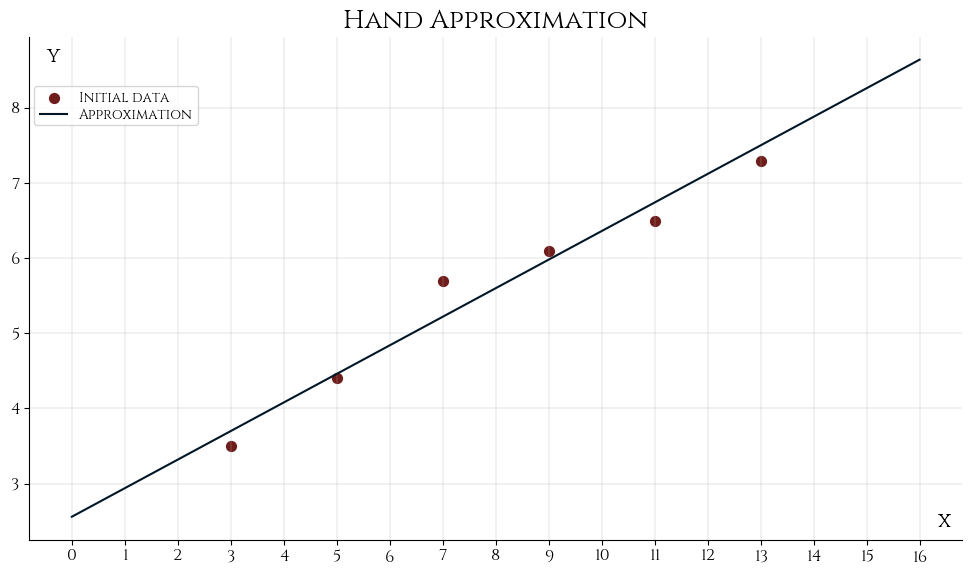

In [3036]:
new_x_values = np.linspace(0, x_values_[-1] + 3, 100)
a_hand = 2.63
b_hand = -3.7
hand_func = lambda x : 1/a_hand * x - 3/a_hand - b_hand
new_y_values = hand_func(new_x_values)

y_values_hand_approximation = new_y_values

buildBar('Plot_Hand_Approximation', 'Approximation', 'Hand Approximation', x_values_, y_values_, new_x_values, new_y_values)

<h2> <center> Задача 1. Пункт 3 </center> </h2>

### - Решить задачу аналитически.
### - Описать нахождение коэффициентов выбранной функции методом наименьших квадратов вручную, с построением промежуточных таблиц значений. 
### - Полученный результат изобразить графически при помощи библиотеки matplotlib, привести код для построения значений; (Аналитическое решение можно выполнить от руки, приложить в отчет отсканированные фото)

<h3> <center> Линейная регрессия. Аналитический метод </center> </h3>

In [3037]:
overlineX = 1/n_ * sum(x_values_)
overlineY = 1/n_ * sum(y_values_)

overlineX2 = 1/n_ * sum([x**2 for x in x_values_])

overlineXY = 1/n_ * sum([x * y for x, y in zip(x_values_, y_values_)])

cov = overlineXY - overlineX * overlineY
Var = overlineX2 - overlineX**2

beta_0 = overlineY - overlineX * (cov/Var)
beta_1 = cov/Var

linear_analytical_beta = [beta_0, beta_1]

print(linear_analytical_beta)

linear_analytical_func = lambda x: linear_analytical_beta[0] + linear_analytical_beta[1] * x

[2.646190476190475, 0.36714285714285727]


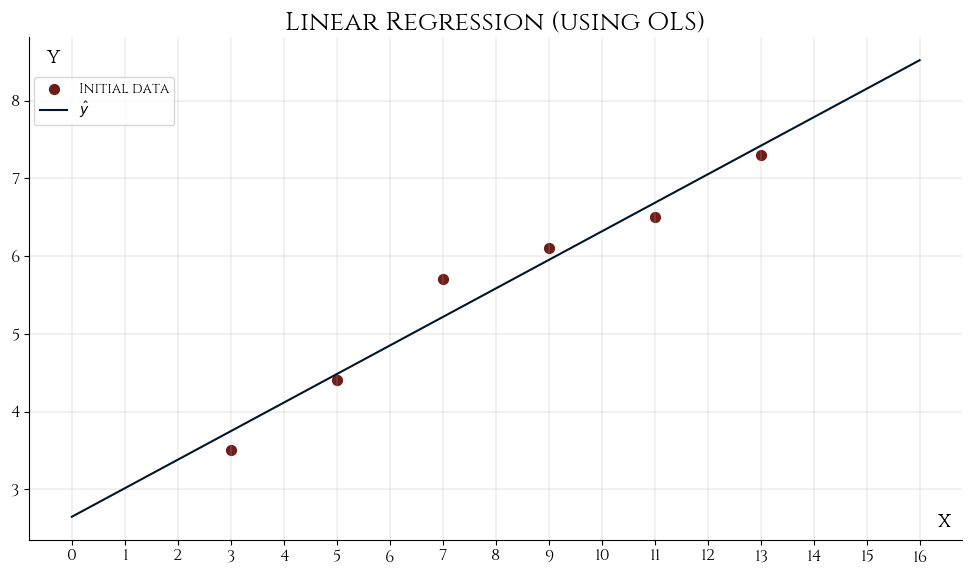

In [3038]:
new_x_values = np.linspace(0, x_values_[-1] + 3, 100)
new_y_values = linear_analytical_func(new_x_values)

y_values_linear_analytical = new_y_values

buildBar('Linear_Regression_Analytical', '$\\hat{y}$', 'Linear Regression (using OLS)', x_values_, y_values_, new_x_values, new_y_values)

<h3> <center> Полиномиальная регрессия. Аналитический метод </center> </h3>

In [3039]:
overlineX,  overlineX2, overlineX3, \
overlineX4, overlineX5, overlineX6 = \
        sympy.symbols('\\overline{X} \\overline{X^2} \\overline{X^3} \\overline{X^4} \\overline{X^5} \\overline{X^6}')
beta0, beta1, \
beta2, beta3 = \
        sympy.symbols('\\hat{\\beta_0} \\hat{\\beta_1} \\hat{\\beta_2} \\hat{\\beta_3}')
overlineY,   overlineXY, \
overlineX2Y, overlineX3Y = \
        sympy.symbols('\\overline{Y} \\overline{XY} \\overline{X^2Y} \\overline{X^3Y}')

In [3040]:
X = sympy.Matrix([[1,          overlineX,  overlineX2, overlineX3], 
                  [overlineX,  overlineX2, overlineX3, overlineX4],
                  [overlineX2, overlineX3, overlineX4, overlineX5],
                  [overlineX3, overlineX4, overlineX5, overlineX6]])
b = sympy.Matrix([beta0, beta1, beta2, beta3])
Y = sympy.Matrix([overlineY, overlineXY, overlineX2Y, overlineX3Y])

print(f'$$ b = {sympy.latex(X)}^{{-1}} {sympy.latex(Y)} $$')
display(Latex(f'$$ b = {sympy.latex(X)}^{{-1}} {sympy.latex(Y)} $$'))

$$ b = \left[\begin{matrix}1 & \overline{X} & \overline{X^2} & \overline{X^3}\\\overline{X} & \overline{X^2} & \overline{X^3} & \overline{X^4}\\\overline{X^2} & \overline{X^3} & \overline{X^4} & \overline{X^5}\\\overline{X^3} & \overline{X^4} & \overline{X^5} & \overline{X^6}\end{matrix}\right]^{-1} \left[\begin{matrix}\overline{Y}\\\overline{XY}\\\overline{X^2Y}\\\overline{X^3Y}\end{matrix}\right] $$


<IPython.core.display.Latex object>

In [3041]:
b = X.inv() * Y

print(f'$$ {sympy.latex(b)} $$')
display(Latex(f'$$ {sympy.latex(b)} $$'))

$$ \left[\begin{matrix}\frac{\overline{XY} \left(- \overline{X^2} \overline{X^3} \overline{X^6} + \overline{X^2} \overline{X^4} \overline{X^5} + \left(\overline{X^3}\right)^{2} \overline{X^5} - \overline{X^3} \left(\overline{X^4}\right)^{2} + \overline{X^4} \overline{X^6} \overline{X} - \left(\overline{X^5}\right)^{2} \overline{X}\right)}{\left(\overline{X^2}\right)^{3} \overline{X^6} - 2 \left(\overline{X^2}\right)^{2} \overline{X^3} \overline{X^5} - \left(\overline{X^2}\right)^{2} \left(\overline{X^4}\right)^{2} + 3 \overline{X^2} \left(\overline{X^3}\right)^{2} \overline{X^4} - 2 \overline{X^2} \overline{X^3} \overline{X^6} \overline{X} + 2 \overline{X^2} \overline{X^4} \overline{X^5} \overline{X} - \overline{X^2} \overline{X^4} \overline{X^6} + \overline{X^2} \left(\overline{X^5}\right)^{2} - \left(\overline{X^3}\right)^{4} + 2 \left(\overline{X^3}\right)^{2} \overline{X^5} \overline{X} + \left(\overline{X^3}\right)^{2} \overline{X^6} - 2 \overline{X^3} \left(\overline{X^4}\right)^

<IPython.core.display.Latex object>

In [3042]:
overlineXn  = lambda n : 1/n_ * sum([x**n for x in x_values_])
overlineXnY = lambda n : 1/n_ * sum([x**n * y for x, y in zip(x_values_, y_values_)])

polynomial_analytical_beta = b.subs([(overlineX,   overlineXn(1)), 
                                     (overlineX2,  overlineXn(2)), 
                                     (overlineX3,  overlineXn(3)), 
                                     (overlineX4,  overlineXn(4)), 
                                     (overlineX5,  overlineXn(5)), 
                                     (overlineX6,  overlineXn(6)),
                                     (overlineY,   overlineXnY(0)),
                                     (overlineXY,  overlineXnY(1)),
                                     (overlineX2Y, overlineXnY(2)),
                                     (overlineX3Y, overlineXnY(3))])

polynomial_analytical_beta

Matrix([
[  0.593303571944944],
[   1.19687499992574],
[-0.0933035714168966],
[0.00312500000035421]])

In [3043]:
polynomial_analytical_func = lambda x: polynomial_analytical_beta[0] + \
                                       polynomial_analytical_beta[1] * x + \
                                       polynomial_analytical_beta[2] * x**2 + \
                                       polynomial_analytical_beta[3] * x**3

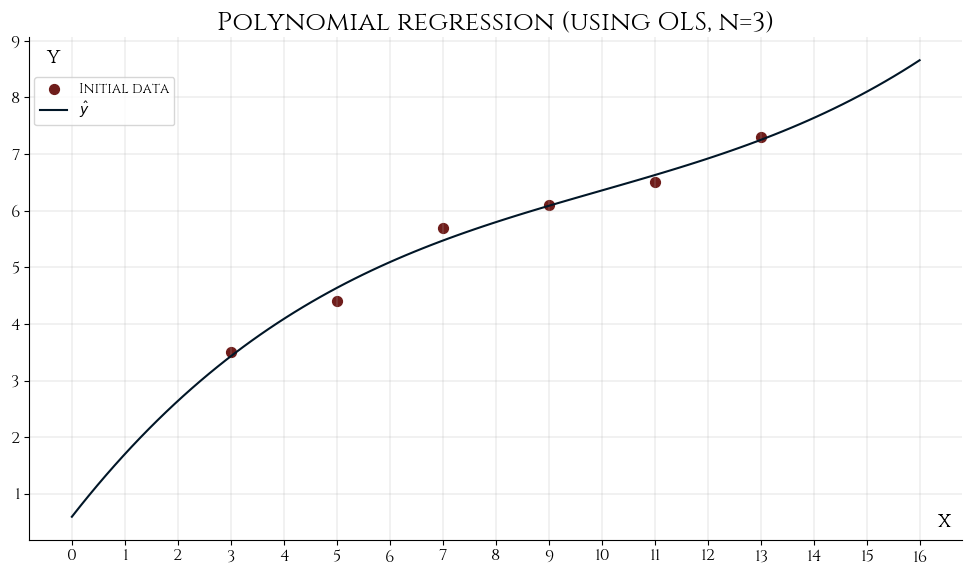

In [3044]:
new_x_values = np.linspace(0, x_values_[-1] + 3, 100)
new_y_values = polynomial_analytical_func(new_x_values)

y_values_polynomial_analytical = new_y_values

buildBar('Polynomial_Regression_Analytical', '$\\hat{y}$', 'Polynomial regression (using OLS, n=3)', x_values_, y_values_, new_x_values, new_y_values)

<h2> <center> Задача 1. Пункт 4 </center> </h2>

### - Решить задачу на языке python с использованием библиотеки numpy, привести код, привести результат решения.
### - Полученный результат изобразить графически при помощи библиотеки matplotlib, привести код для построения значений.

<h3> <center> Линейная регрессия с использованием numpy </center> </h3>

In [3045]:
X = np.array([np.ones(n_), np.array(x_values_)]).T
Y = np.array(y_values_).T
linear_numpy_beta = np.linalg.inv((X.T @ X)) @ X.T @ Y

linear_numpy_beta

array([2.64619048, 0.36714286])

In [3046]:
linear_numpy_func = lambda x: linear_numpy_beta[0] + linear_numpy_beta[1] * x

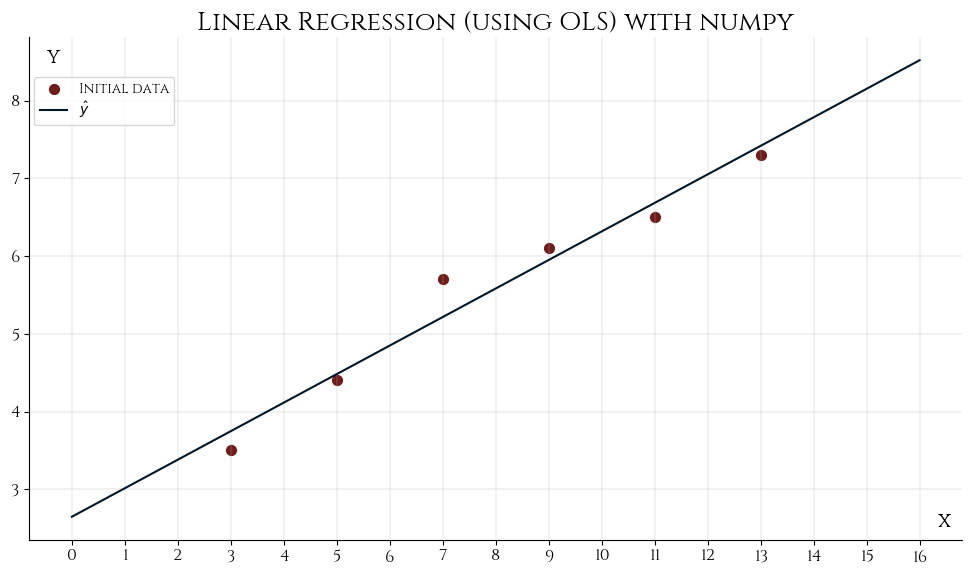

In [3047]:
new_x_values = np.linspace(0, x_values_[-1] + 3, 100)
new_y_values = linear_numpy_func(new_x_values)

y_values_linear_numpy = new_y_values

buildBar('Linear_Regression_numpy', '$\\hat{y}$', 'Linear Regression (using OLS) with numpy', x_values_, y_values_, new_x_values, new_y_values)

<h3> <center> Полиномиальная регрессия (n=3) с использованием numpy </center> </h3>

In [3048]:
X = np.array([np.ones(n_), np.array(x_values_), np.array(x_values_)**2, np.array(x_values_)**3]).T
Y = np.array(y_values_).T
polynomial_numpy_beta = np.linalg.inv((X.T @ X)) @ X.T @ Y

polynomial_numpy_beta

array([ 0.59330357,  1.196875  , -0.09330357,  0.003125  ])

In [3049]:
polynomial_numpy_func = lambda x: polynomial_numpy_beta[0] + \
                                  polynomial_numpy_beta[1] * x + \
                                  polynomial_numpy_beta[2] * x**2 + \
                                  polynomial_numpy_beta[3] * x**3

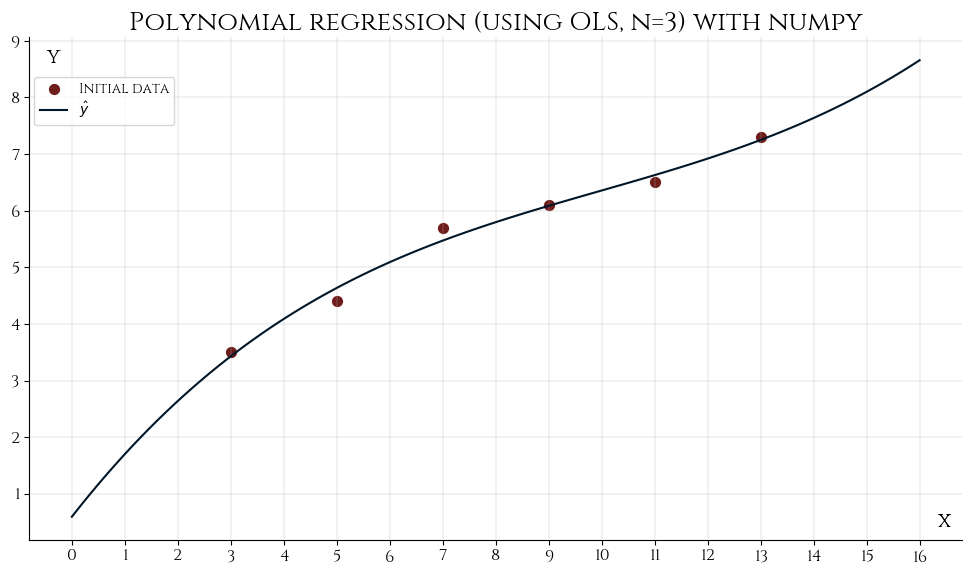

In [3050]:
new_x_values = np.linspace(0, x_values_[-1] + 3, 100)
new_y_values = polynomial_numpy_func(new_x_values)

y_values_polynomial_numpy = new_y_values

buildBar('Polynomial_Regression_numpy', '$\\hat{y}$', 'Polynomial regression (using OLS, n=3) with numpy', x_values_, y_values_, new_x_values, new_y_values)

<h2> <center> Задача 1. Пункт 5 </center> </h2>

### - Решить задачу на языке python с использованием библиотеки scipy и matplotlib.
### - Полученный результат изобразить графически при помощи библиотеки matplotlib, привести код для построения значений.

In [3051]:
linear_scipy_func = lambda x, intercept, slope: intercept + slope * x

polynomial_scipy_func = lambda x, coeff: coeff[0] + \
                                         coeff[1] * x + \
                                         coeff[2] * x**2 + \
                                         coeff[3] * x**3

<h3> <center> Линейная регрессия с использованием scipy (scipy.stats.linregress) </center> </h3>

In [3052]:
linregressResult = sp.stats.linregress(x=x_values_, y=y_values_)

print(linregressResult.intercept, linregressResult.slope)

2.6461904761904766 0.36714285714285705


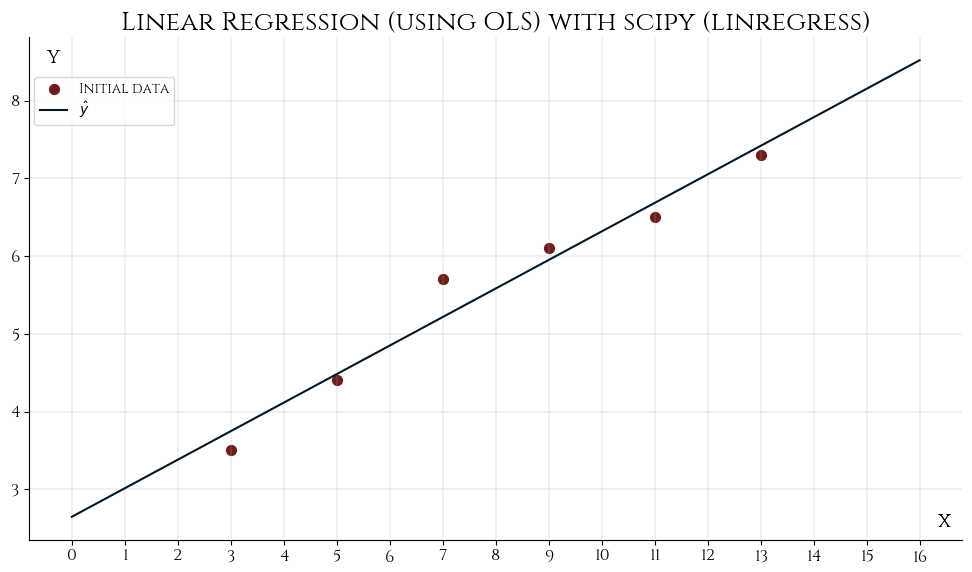

In [3053]:
new_x_values = np.linspace(0, x_values_[-1] + 3, 100)
new_y_values = linear_scipy_func(new_x_values, linregressResult.intercept, 
                                               linregressResult.slope)

y_values_linear_scipy_linregress = new_y_values

buildBar('Linear_Regression_scipy_linregress', 
         '$\\hat{y}$', 
         'Linear Regression (using OLS) with scipy (linregress)', 
         x_values_, 
         y_values_, 
         new_x_values, 
         new_y_values)

<h3> <center> Линейная регрессия с использованием scipy (scipy.optimize.least_squares) </center> </h3>

In [3054]:
def func(beta, x, y):
    return beta[0] + beta[1] * x - y

beta0 = np.array([1.0, 1.0])

res_linear_lsq = sp.optimize.least_squares(func, beta0, args=(np.array(x_values_), 
                                                              np.array(y_values_)))
res_linear_lsq.x

array([2.64619047, 0.36714286])

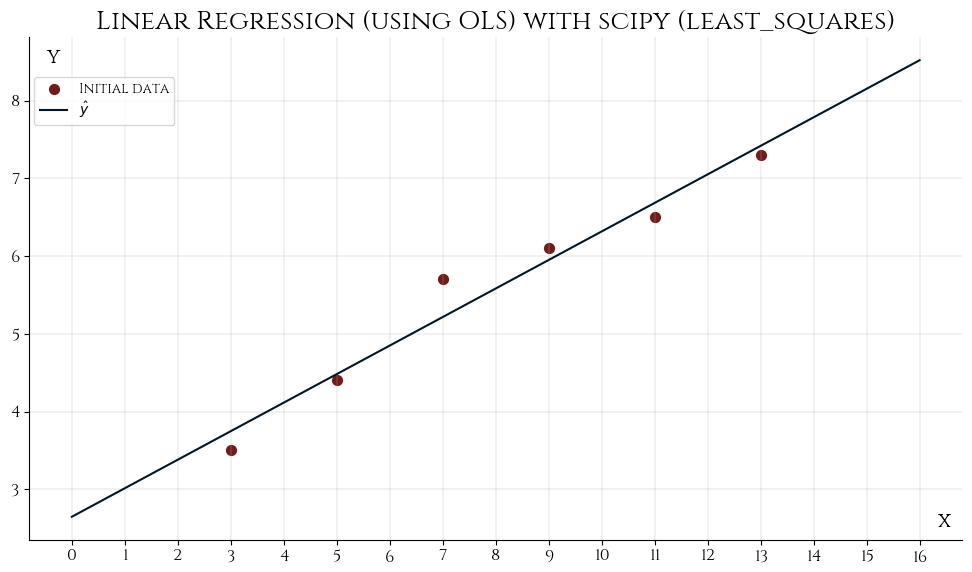

In [3055]:
new_x_values = np.linspace(0, x_values_[-1] + 3, 100)
new_y_values = linear_scipy_func(new_x_values, res_linear_lsq.x[0], res_linear_lsq.x[1])

y_values_linear_scipy_least_squares = new_y_values

buildBar('Linear_Regression_scipy_least_squares', 
         '$\\hat{y}$', 
         'Linear Regression (using OLS) with scipy (least_squares)', 
         x_values_, 
         y_values_,
         new_x_values, 
         new_y_values)

<h3> <center> Линейная регрессия с использованием scipy (scipy.linalg.lstsq) </center> </h3>

In [3056]:
M = np.array([np.ones(n_), np.array(x_values_)]).T
y = np.array(y_values_)

p_linear, res, rnk, s = sp.linalg.lstsq(M, y)
p_linear

array([2.64619048, 0.36714286])

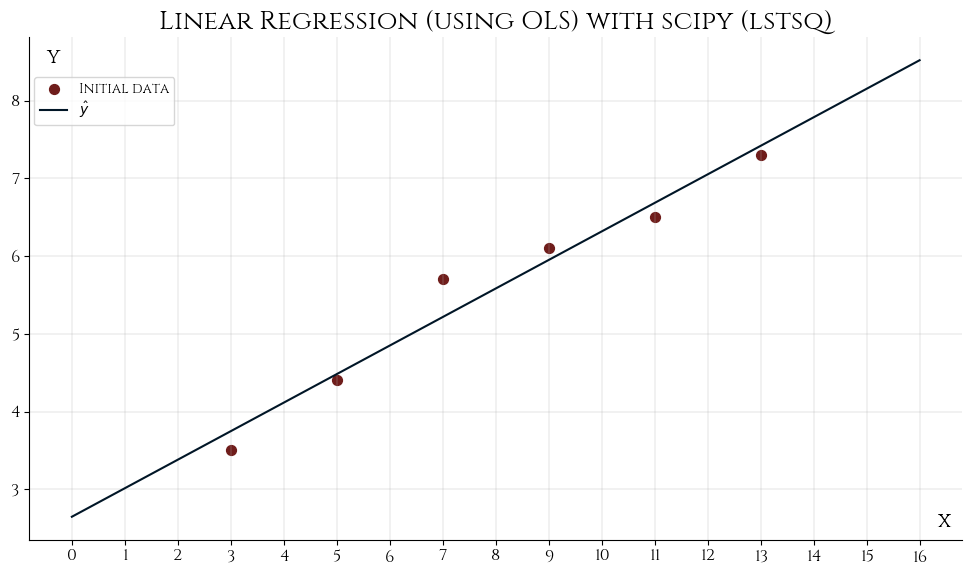

In [3057]:
new_x_values = np.linspace(0, x_values_[-1] + 3, 100)
new_y_values = linear_scipy_func(new_x_values, p_linear[0], p_linear[1])

y_values_linear_scipy_lstsq = new_y_values

buildBar('Linear_Regression_scipy_lstsq', 
         '$\\hat{y}$', 
         'Linear Regression (using OLS) with scipy (lstsq)', 
         x_values_, 
         y_values_, 
         new_x_values, 
         new_y_values)

<h3> <center> Полиномиальная регрессия (n=3) с использованием scipy (scipy.optimize.least_squares) </center> </h3>

In [3058]:
def func(beta, x, y):
    return beta[0] + beta[1] * x + beta[2] * x**2 + beta[3] * x**3 - y

beta0 = np.array([1.0, 1.0, 1.0, 1.0])

res_polynomial_lsq = sp.optimize.least_squares(func, beta0, args=(np.array(x_values_), np.array(y_values_)))
res_polynomial_lsq.x

array([ 0.59330357,  1.196875  , -0.09330357,  0.003125  ])

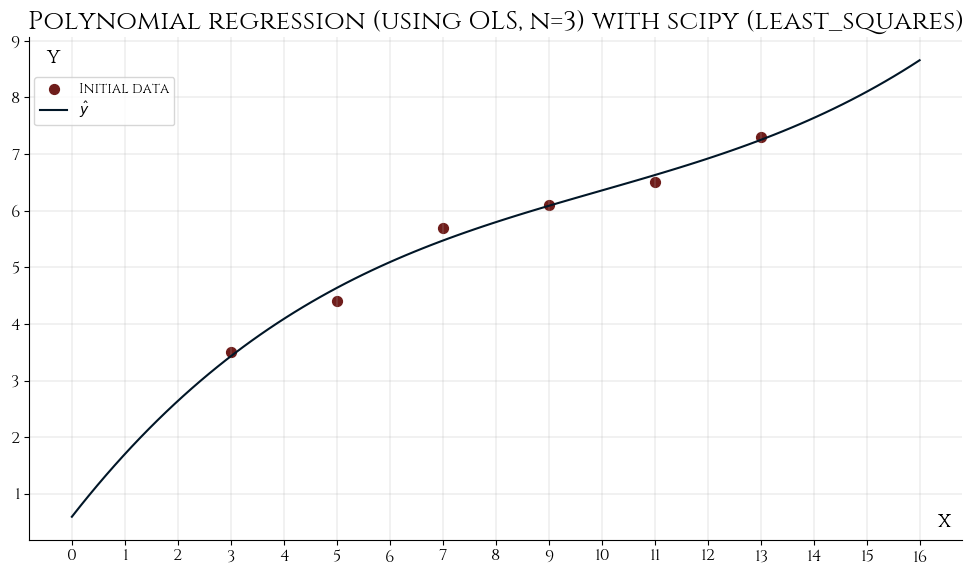

In [3059]:
new_x_values = np.linspace(0, x_values_[-1] + 3, 100)
new_y_values = polynomial_scipy_func(new_x_values, res_polynomial_lsq.x)

y_values_polynomial_scipy_least_squares = new_y_values

buildBar('Polynomial_Regression_scipy_least_squares', 
         '$\\hat{y}$', 
         'Polynomial regression (using OLS, n=3) with scipy (least_squares)', 
         x_values_, 
         y_values_, 
         new_x_values, 
         new_y_values)

<h3> <center> Полиномиальная регрессия (n=3) с использованием scipy (scipy.linalg.lstsq) </center> </h3>

In [3060]:
M = np.array([np.ones(n_), np.array(x_values_), 
                           np.array(x_values_)**2, 
                           np.array(x_values_)**3]).T
y = np.array(y_values_)

p_polynomial, res, rnk, s = sp.linalg.lstsq(M, y)
p_polynomial

array([ 0.59330357,  1.196875  , -0.09330357,  0.003125  ])

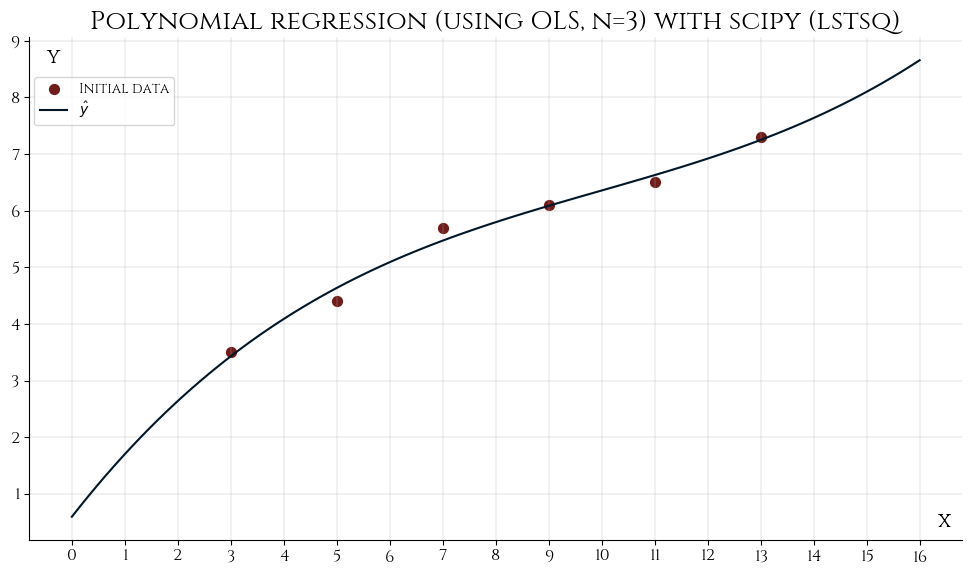

In [3061]:
new_x_values = np.linspace(0, x_values_[-1] + 3, 100)
new_y_values = polynomial_scipy_func(new_x_values, p_polynomial)

y_values_polynomial_scipy_lstsq = new_y_values

buildBar('Polynomial_Regression_scipy_lstsq', 
         '$\\hat{y}$', 
         'Polynomial regression (using OLS, n=3) with scipy (lstsq)', 
         x_values_, 
         y_values_, 
         new_x_values, 
         new_y_values)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h3> <center> Линейная регрессия с использованием scipy </center> </h3>

In [3062]:
# X = np.array([np.ones(n_), np.array(x_values_)]).T
# Y = np.array(y_values_).T
# linear_scipy_beta = sp.linalg.inv((X.T @ X)) @ X.T @ Y

# linear_scipy_beta

In [3063]:
# linear_scipy_func = lambda x: linear_scipy_beta[0] + linear_scipy_beta[1] * x

In [3064]:
# new_x_values = np.linspace(0, x_values_[-1] + 3, 100)
# new_y_values = linear_scipy_func(new_x_values)

# y_values_linear_scipy = new_y_values

# buildBar('Linear_Regression_scipy', '$\\hat{y}$', 'Linear Regression (using OLS) with scipy', x_values_, y_values_, new_x_values, new_y_values)

<h3> <center> Полиномиальная регрессия (n=3) с использованием scipy </center> </h3>

In [3065]:
# X = np.array([np.ones(n_), np.array(x_values_), np.array(x_values_)**2, np.array(x_values_)**3]).T
# Y = np.array(y_values_).T
# polynomial_scipy_beta = sp.linalg.inv((X.T @ X)) @ X.T @ Y

# polynomial_scipy_beta

In [3066]:
# polynomial_scipy_func = lambda x: polynomial_scipy_beta[0] + \
#                                   polynomial_scipy_beta[1] * x + \
#                                   polynomial_scipy_beta[2] * x**2 + \
#                                   polynomial_scipy_beta[3] * x**3

In [3067]:
# new_x_values = np.linspace(0, x_values_[-1] + 3, 100)
# new_y_values = polynomial_scipy_func(new_x_values)

# y_values_polynomial_scipy = new_y_values

# buildBar('Polynomial_Regression_scipy', '$\\hat{y}$', 'Polynomial regression (using OLS, n=3) with scipy', x_values_, y_values_, new_x_values, new_y_values)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h2> <center> Задача 1. Пункт 6 </center> </h2>

### - Сравнить решения, полученные вручную и с помощью решения на python, построить решения графически.
### - Оценить точность полученных решений.

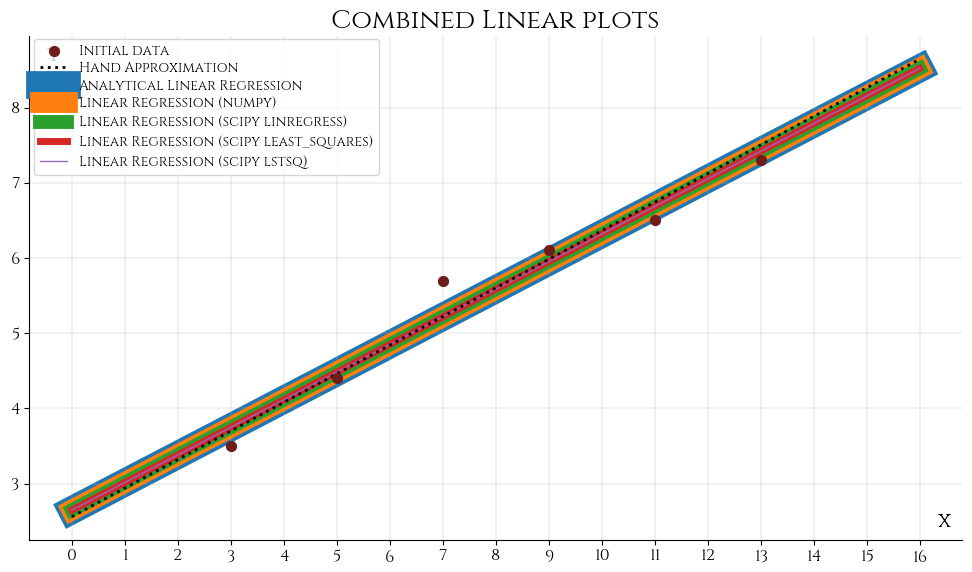

In [3068]:
def buildBar(filename):
    _, ax = plt.subplots(figsize=(10, 6))

    ax.scatter(x_values_, 
               y_values_, 
               color=RED,
               s=50,
               label='Initial data',
               zorder=7)

    universal_x_values = np.linspace(0, x_values_[-1] + 3, 100)

    ax.plot(universal_x_values, y_values_hand_approximation, 
            linestyle=':', linewidth=2, 
            color='black', label='Hand Approximation', zorder=6)
    ax.plot(universal_x_values, y_values_linear_analytical, 
            linewidth=20, 
            label='Analytical Linear Regression', zorder=1)
    ax.plot(universal_x_values, 
            y_values_linear_numpy, 
            linewidth=15, 
            label='Linear Regression (numpy)', zorder=2)
    ax.plot(universal_x_values, 
            y_values_linear_scipy_linregress, 
            linewidth=10, 
            label='Linear Regression (scipy linregress)', zorder=3)
    ax.plot(universal_x_values, 
            y_values_linear_scipy_least_squares, 
            linewidth=5, 
            label='Linear Regression (scipy least_squares)', zorder=4)
    ax.plot(universal_x_values, 
            y_values_linear_scipy_lstsq, 
            linewidth=1, 
            label='Linear Regression (scipy lstsq)', zorder=5)

    plt.grid(linestyle='-', linewidth=0.25)

    ax.set_title('Combined Linear plots')
    decorate_plot(ax, np.arange(universal_x_values[0], 
                                universal_x_values[-1]+1, 1), 
                                'x', 'y', loc=(0.005, 0.725))
    
    if SAVE_PLOTS:
        plt.savefig(f'images/{filename}.png', dpi=300, transparent=True)

    plt.show()

buildBar('Combined_Linear_Plots')

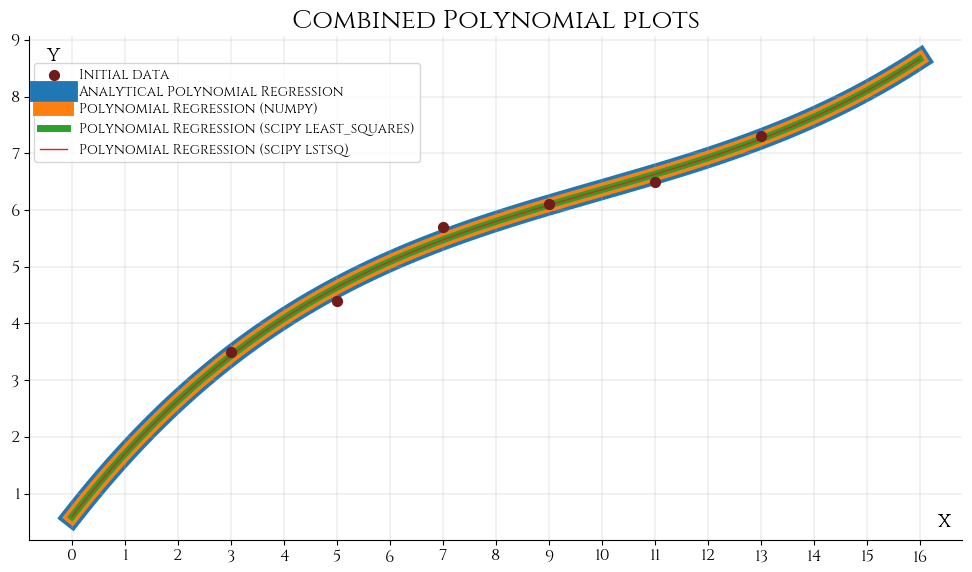

In [3069]:
def buildBar(filename):
    _, ax = plt.subplots(figsize=(10, 6))

    ax.scatter(x_values_, 
               y_values_, 
               color=RED,
               s=50,
               label='Initial data', 
               zorder=5)

    universal_x_values = np.linspace(0, x_values_[-1] + 3, 100)

    ax.plot(universal_x_values, y_values_polynomial_analytical, 
            linewidth=15, label='Analytical Polynomial Regression', zorder=1)
    ax.plot(universal_x_values, y_values_polynomial_numpy, 
            linewidth=10, label='Polynomial Regression (numpy)', zorder=2)
    ax.plot(universal_x_values, y_values_polynomial_scipy_least_squares, 
            linewidth=5, label='Polynomial Regression (scipy least_squares)', zorder=3)
    ax.plot(universal_x_values, y_values_polynomial_scipy_lstsq, 
            linewidth=1, label='Polynomial Regression (scipy lstsq)', zorder=4)

    plt.grid(linestyle='-', linewidth=0.25)

    ax.set_title('Combined Polynomial plots')
    decorate_plot(ax, np.arange(universal_x_values[0], 
                                universal_x_values[-1]+1, 1), 
                                'x', 'y', loc=(0.005, 0.75))
    
    if SAVE_PLOTS:
        plt.savefig(f'images/{filename}.png', dpi=300, transparent=True)

    plt.show()

buildBar('Combined_Polynomial_Plots')

In [3070]:
@dataclass
class Regression:
    name: str
    value: np.array

In [3071]:
print(np.mean(y_values_hand_approximation-y_values_linear_analytical))
print(np.mean(y_values_hand_approximation-y_values_linear_numpy))
print(np.mean(y_values_hand_approximation-y_values_linear_scipy_linregress))
print(np.mean(y_values_hand_approximation-y_values_linear_scipy_least_squares))
print(np.mean(y_values_hand_approximation-y_values_linear_scipy_lstsq))

print('-'*200)

linear = [
    Regression('y_values_linear_analytical', y_values_linear_analytical), 
    Regression('y_values_linear_numpy', y_values_linear_numpy),
    Regression('y_values_linear_scipy_linregress', y_values_linear_scipy_linregress),
    Regression('y_values_linear_scipy_least_squares', y_values_linear_scipy_least_squares),
    Regression('y_values_linear_scipy_lstsq', y_values_linear_scipy_lstsq)
]

pairs = list(itertools.combinations(linear, 2))
for pair in pairs:
    diff = np.mean(np.abs(pair[0].value - pair[1].value))
    print(f'|{pair[0].name:<39} - {pair[1].name:<40}|: {diff}')

print('-'*200)

polynomial = [
    Regression('y_values_polynomial_analytical', y_values_polynomial_analytical), 
    Regression('y_values_polynomial_numpy', y_values_polynomial_numpy),
    Regression('y_values_polynomial_scipy_least_squares', y_values_polynomial_scipy_least_squares),
    Regression('y_values_polynomial_scipy_lstsq', y_values_polynomial_scipy_lstsq)
]

pairs = list(itertools.combinations(polynomial, 2))
for pair in pairs:
    diff = np.mean(np.abs(pair[0].value - pair[1].value))
    print(f'|{pair[0].name:<39} - {pair[1].name:<40}|: {diff}')

0.017807351077313804
0.017807351077314702
0.017807351077313925
0.01780735301229668
0.017807351077313804
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|y_values_linear_analytical              - y_values_linear_numpy                   |: 9.636735853746358e-16
|y_values_linear_analytical              - y_values_linear_scipy_linregress        |: 9.947598300641404e-16
|y_values_linear_analytical              - y_values_linear_scipy_least_squares     |: 2.983494837849321e-09
|y_values_linear_analytical              - y_values_linear_scipy_lstsq             |: 0.0
|y_values_linear_numpy                   - y_values_linear_scipy_linregress        |: 7.771561172376096e-16
|y_values_linear_numpy                   - y_values_linear_scipy_least_squares     |: 2.983495162034444e-09
|y_values_linear_numpy                   - y_values_linear_scipy_

<h2> <center> Задача 1. Пункт 7 </center> </h2>

### - С помощью полученной модели предсказать значения y для значений x = 4,5; x = 5.

In [ ]:
@dataclass
class Func:
    name: str
    func: Callable
    args: tuple = ()
    kwargs: dict = None

    def execute(self, x):
        if self.kwargs is None:
            self.kwargs = {}
        # print(self.args, len(self.args))
        if len(self.args) == 4:
            return self.func(x, self.args, **self.kwargs)
        else:
            return self.func(x, *self.args, **self.kwargs)

funcs = [
    Func('Hand approximation',                          
         hand_func),
    Func('Linear Analytical Regression',                
         linear_analytical_func),
    Func('Polynomial Analytical Regression',            
         polynomial_analytical_func),
    Func('Linear Regression (numpy)',                   
         linear_numpy_func),
    Func('Polynomial Regression (numpy)',               
         polynomial_numpy_func),
    Func('Linear Regression (scipy linregress)',        
         linear_scipy_func, args=(linregressResult.intercept, 
                                  linregressResult.slope)),
    Func('Linear Regression (scipy least_squares)',     
         linear_scipy_func, args=((res_linear_lsq.x[0],
                                   res_linear_lsq.x[1]))),
    Func('Linear Regression (scipy lstsq)',             
         linear_scipy_func, args=((p_linear[0],
                                   p_linear[1]))),
    Func('Polynomial Regression (scipy least_squares)', 
         polynomial_scipy_func, args=(res_polynomial_lsq.x)), 
    Func('Polynomial Regression (scipy lstsq)',         
         polynomial_scipy_func, args=(p_polynomial))
]

x_data = [4.5, 5]

for func in funcs:
    for x in x_data:
        print(f'Calculating x = {x:<5} with {func.name + ",":<44} result: {func.execute(x)}')

Calculating x = 4.5   with Hand approximation,                          result: 4.270342205323194
Calculating x = 5     with Hand approximation,                          result: 4.460456273764259
Calculating x = 4.5   with Linear Analytical Regression,                result: 4.298333333333333
Calculating x = 5     with Linear Analytical Regression,                result: 4.481904761904762
Calculating x = 4.5   with Polynomial Analytical Regression,            result: 4.37460937545089
Calculating x = 5     with Polynomial Analytical Regression,            result: 4.63571428619550
Calculating x = 4.5   with Linear Regression (numpy),                   result: 4.298333333333332
Calculating x = 5     with Linear Regression (numpy),                   result: 4.481904761904761
Calculating x = 4.5   with Polynomial Regression (numpy),               result: 4.374609374991685
Calculating x = 5     with Polynomial Regression (numpy),               result: 4.635714285706156
Calculating x = 4.5   

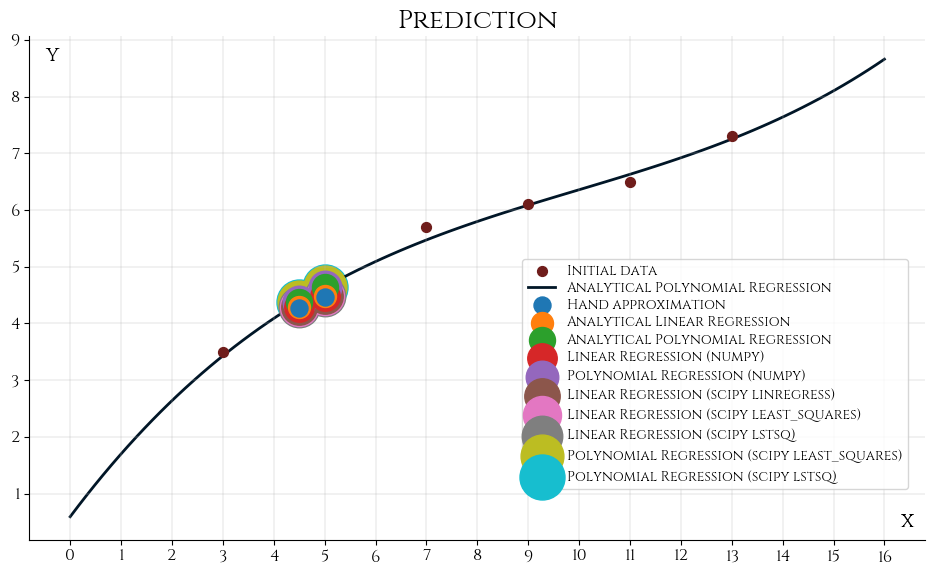

In [3073]:
def buildBar(filename):
    _, ax = plt.subplots(figsize=(10, 6))

    # initial data
    ax.scatter(x_values_,
               y_values_,
               color=RED,
               s=50,
               label='Initial data',
               zorder=2)

    # analytical polynomial regression
    universal_x_values = np.linspace(0, x_values_[-1] + 3, 100)

    ax.plot(universal_x_values,
            y_values_polynomial_analytical,
            linewidth=2,
            label='Analytical Polynomial Regression',
            zorder=1,
            color=RICH_BLACK)

    # predicted values
    methods = [
        "Hand approximation",
        "Analytical Linear Regression",
        "Analytical Polynomial Regression",
        "Linear Regression (numpy)",
        "Polynomial Regression (numpy)",
        "Linear Regression (scipy linregress)",
        "Linear Regression (scipy least_squares)",
        "Linear Regression (scipy lstsq)",
        "Polynomial Regression (scipy least_squares)",
        "Polynomial Regression (scipy lstsq)",
    ]

    x_values = [4.5, 5]
    results = {
        "Hand approximation": [4.270342205323194, 4.460456273764259],
        "Analytical Linear Regression": [4.298333333333333, 4.481904761904762],
        "Analytical Polynomial Regression": [4.37460937545089, 4.63571428619550],
        "Linear Regression (numpy)": [4.298333333333332, 4.481904761904761],
        "Polynomial Regression (numpy)": [4.374609374991685, 4.635714285706156],
        "Linear Regression (scipy linregress)": [4.298333333333334, 4.481904761904762],
        "Linear Regression (scipy least_squares)": [4.298333329122352, 4.481904758018923],
        "Linear Regression (scipy lstsq)": [4.298333333333333, 4.481904761904762],
        "Polynomial Regression (scipy least_squares)": [4.374609375000068, 4.635714285714329],
        "Polynomial Regression (scipy lstsq)": [4.374609375000143, 4.6357142857144185],
    }

    i = 3
    for method in methods:
        plt.scatter(x_values, results[method], label=method, s=50 + 100 * (i-2), zorder=12-i)
        # print(50 + 25 * (i-2), 12-i)
        i += 1

    plt.grid(linestyle='-', linewidth=0.25)

    ax.set_title('Prediction')
    decorate_plot(ax, np.arange(universal_x_values[0], universal_x_values[-1]+1, 1), 'x', 'y', loc=(0.55, 0.1))

    if SAVE_PLOTS:
        plt.savefig(f'images/{filename}.png', dpi=300, transparent=True)

    plt.show()

buildBar('Prediction_Plot')